In [2]:
import yfinance as yf
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
crypto_btc = yf.download(tickers='BTC-USD', start='2018-01-01', end='2022-12-31').drop(columns=['Adj Close', 'High', 'Low']).round(2).reset_index()
crypto_eth = yf.download(tickers='ETH-USD', start='2018-01-01', end='2022-12-31').drop(columns=['Adj Close', 'High', 'Low']).round(2).reset_index()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
crypto_btc['Percent Change'] = crypto_btc['Close'].pct_change()
crypto_eth['Percent Change'] = crypto_eth['Close'].pct_change()

<AxesSubplot:xlabel='Date'>

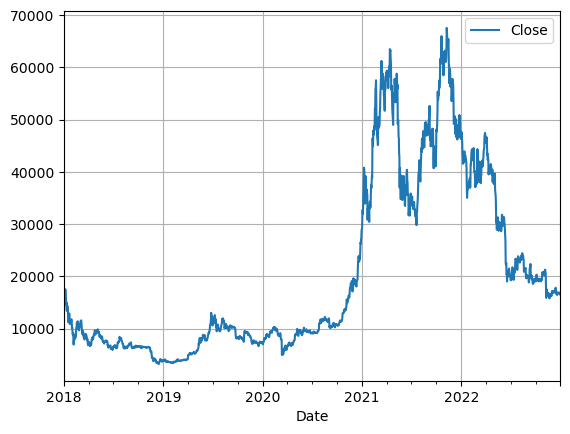

In [5]:
crypto_btc.plot(
    x = 'Date',
    y = 'Close',
    grid = True
)

<AxesSubplot:xlabel='Date'>

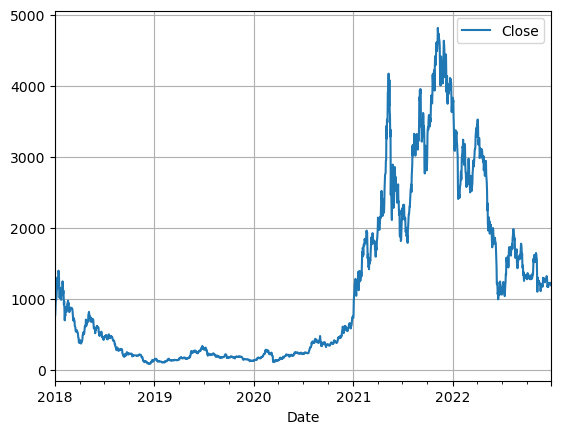

In [6]:
crypto_eth.plot(
    x = 'Date',
    y = 'Close',
    grid = True
)

In [7]:
crypto_btc.head()

,Date,Open,Close,Volume,Percent Change
0,2018-01-01 00:00:00+00:00,14112.2,13657.2,10291200000,NaN
1,2018-01-02 00:00:00+00:00,13625.0,14982.1,16846600192,0.097011
2,2018-01-03 00:00:00+00:00,14978.2,15201.0,16871900160,0.014611
3,2018-01-04 00:00:00+00:00,15270.7,15599.2,21783199744,0.026196
4,2018-01-05 00:00:00+00:00,15477.2,17429.5,23840899072,0.117333


In [8]:
X = crypto_btc[['Open', 'Volume']]
X

,Open,Volume
0,14112.20,10291200000
1,13625.00,16846600192
2,14978.20,16871900160
3,15270.70,21783199744
4,15477.20,23840899072
...,...,...
1820,16842.25,11886957804
1821,16919.29,15748580239
1822,16716.40,17005713920
1823,16552.32,14472237479


In [9]:
y = crypto_btc[['Date','Close']]
y

,Date,Close
0,2018-01-01 00:00:00+00:00,13657.20
1,2018-01-02 00:00:00+00:00,14982.10
2,2018-01-03 00:00:00+00:00,15201.00
3,2018-01-04 00:00:00+00:00,15599.20
4,2018-01-05 00:00:00+00:00,17429.50
...,...,...
1820,2022-12-26 00:00:00+00:00,16919.80
1821,2022-12-27 00:00:00+00:00,16717.17
1822,2022-12-28 00:00:00+00:00,16552.57
1823,2022-12-29 00:00:00+00:00,16642.34


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)


In [11]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=10)

In [12]:
model.fit(X_train, y_train, verbose= False)

: 

: 